### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer,one_hot
# handle the constant text length
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM, Conv1D, Dropout, MaxPooling1D, MaxPooling1D, AvgPool1D
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
true_data = pd.read_csv('/content/drive/MyDrive/Fake_News_Kaggle/True.csv')
fake_data = pd.read_csv('/content/drive/MyDrive/Fake_News_Kaggle/Fake.csv')

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data.shape

(23481, 4)

In [ ]:
true_data.shape

(21417, 4)

### **Distribution of Dataset**

In [ ]:
len(fake_data.index)

23481

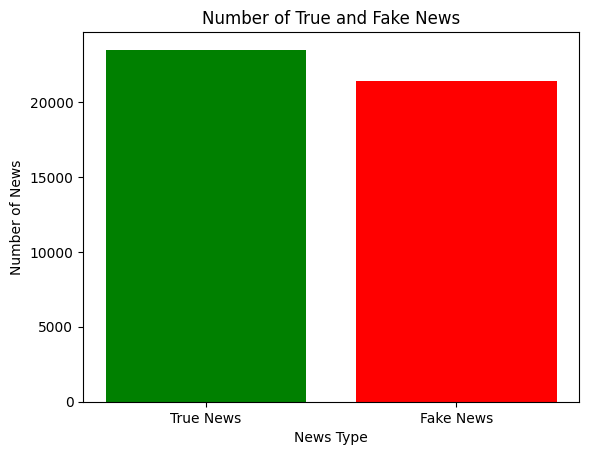

In [ ]:
labels = ['True News', 'Fake News']
heights = [len(fake_data.index), len(true_data.index)]
colors = ['green', 'red']
plt.bar(labels, heights, color=colors)
plt.xlabel('News Type')
plt.ylabel('Number of News')
plt.title('Number of True and Fake News')
plt.show()

# Distribution of both true and fake news is almost similar, hence dataset is balanced.

### **Visualize data based on subject category**

In [ ]:
fake_data_df = pd.DataFrame(fake_data)
grouped = fake_data_df.groupby('subject').size()
print(grouped)

subject
Government News    1570
Middle-east         778
News               9050
US_News             783
left-news          4459
politics           6841
dtype: int64


<Axes: xlabel='subject', ylabel='count'>

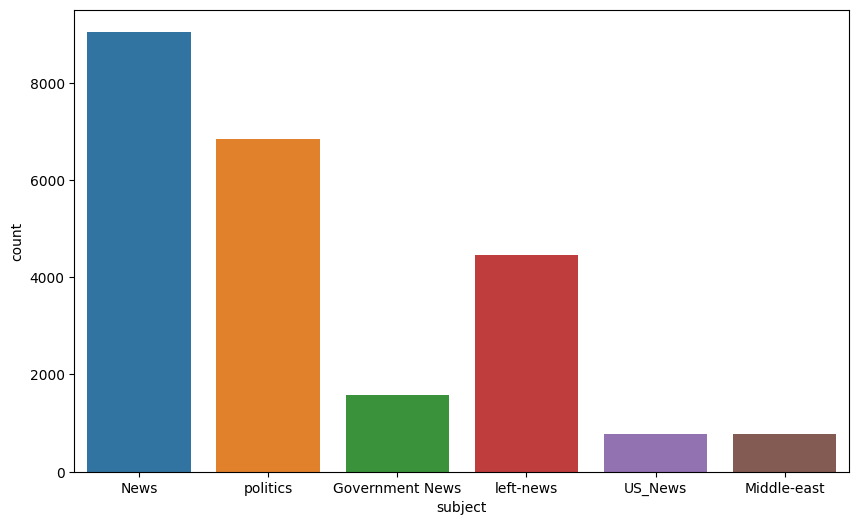

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data=fake_data)

### **Numerical Definition to True/False**

In [ ]:
true_data['label'] = 1;
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_data['label'] = 0;
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### **WordCloud to plot the most frequent words**

In [ ]:
fake_text = ' '.join(fake_data['text'].tolist())

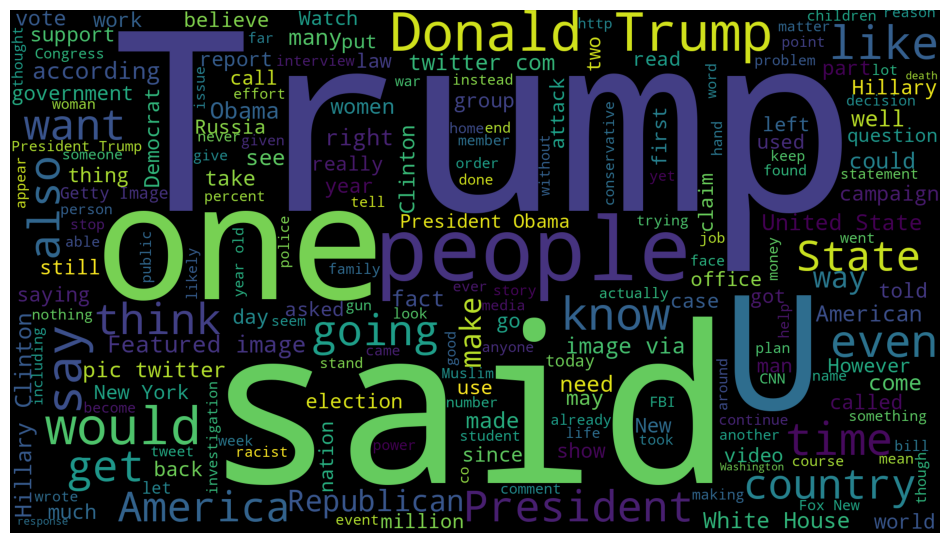

In [ ]:
wordcloud = WordCloud(width = 1920,
                      height = 1080,
                      stopwords = set(nltk.corpus.stopwords.words("english"))).generate(fake_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
true_text = ' '.join(true_data['text'].tolist())

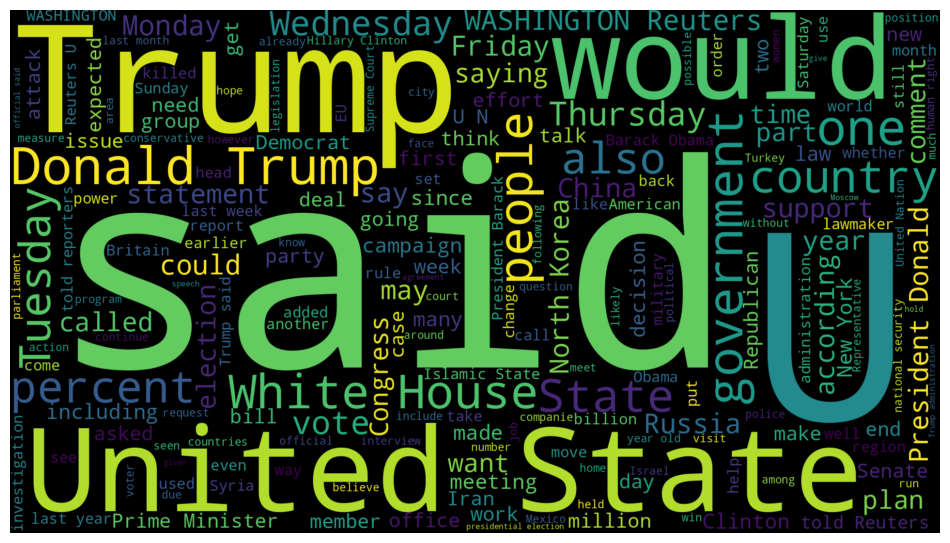

In [ ]:
wordcloud = WordCloud(width=1920,
                      height=1080,
                      stopwords = set(nltk.corpus.stopwords.words("english"))).generate(true_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
true_data.sample(10)

,title,text,subject,date,label
7650,Clinton campaign says 'confident' FBI conclusi...,WASHINGTON (Reuters) - The chairman of Hillary...,politicsNews,"October 28, 2016",1
876,Federal Reserve governor Powell's policy views...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",1
10690,Trump loves 'the poorly educated' ... and soci...,(Reuters) - U.S. presidential candidate Donald...,politicsNews,"February 24, 2016",1
14531,"Nine killed, others injured in minibus crash i...",SOFIA (Reuters) - Nine people were killed and ...,worldnews,"November 17, 2017",1
9786,Jury deadlocks over tax-evasion charges agains...,SEATTLE (Reuters) - A jury did not convict Was...,politicsNews,"April 26, 2016",1
3803,Former intelligence chief Clapper: Comey was u...,WASHINGTON (Reuters) - Former Director of Nati...,politicsNews,"May 12, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON (Reuters) - Abdul Daoud spilt most of t...,worldnews,"August 23, 2017",1
4327,Trump national security aide McFarland may bec...,"PALM BEACH, Fla. (Reuters) - President Donald ...",politicsNews,"April 9, 2017",1
1949,Kremlin says U.S. closure of consulate fuels U...,MOSCOW (Reuters) - The Kremlin said on Friday ...,politicsNews,"September 1, 2017",1
17894,Iran's armed forces say time to teach U.S. 'ne...,LONDON (Reuters) - A spokesman for Iran s arme...,worldnews,"October 10, 2017",1


### **Cleaning Data**

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(true_data.text.values):
  if ' - ' in row:
    record = row.split(' - ',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())
  else:
    publisher.append('unknown')
    tmp_text.append(row)

In [ ]:
true_data['publisher'] = publisher
true_data['text'] = tmp_text

In [ ]:
true_data.head(5)

,title,text,subject,date,label,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",1,WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",1,WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",1,SEATTLE/WASHINGTON (Reuters)


### **Combine into single dataframe**

In [ ]:
true_data['text'] = true_data['title'] + " " + true_data['text']
fake_data['text'] = fake_data['title'] + " " + fake_data['text']

In [ ]:
true_data['text'] = true_data['text'].apply(lambda x: str(x).lower())
fake_data['text'] = fake_data['text'].apply(lambda x: str(x).lower())

In [ ]:
true_data = true_data[['text','label']]
true_data.head()

,text,label
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [ ]:
fake_data = fake_data[['text','label']]
fake_data.head()

,text,label
0,donald trump sends out embarrassing new year’...,0
1,drunk bragging trump staffer started russian ...,0
2,sheriff david clarke becomes an internet joke...,0
3,trump is so obsessed he even has obama’s name...,0
4,pope francis just called out donald trump dur...,0


In [ ]:
news_data = pd.concat([true_data,fake_data],axis=0)
news_data.sample(5)

,text,label
10532,u.s. senators urge obama to push for female u....,1
1456,trump shocked as new poll reveals the future ...,0
16566,detroit free press editor calls for gruesome m...,0
2433,massachusetts governor signs bill hiking tax o...,1
6003,white house says looks to reschedule meeting w...,1


### **Preprocessing of data**

In [ ]:
news_data['processed_text'] = news_data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [ ]:
stop = stopwords.words('english')
news_data['processed_text'] = news_data['processed_text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
news_data.head()

,text,label,processed_text
0,"as u.s. budget fight looms, republicans flip t...",1,us budget fight looms republicans flip fiscal ...
1,u.s. military to accept transgender recruits o...,1,us military accept transgender recruits monday...
2,senior u.s. republican senator: 'let mr. muell...,1,senior us republican senator let mr mueller jo...
3,fbi russia probe helped by australian diplomat...,1,fbi russia probe helped australian diplomat ti...
4,trump wants postal service to charge 'much mor...,1,trump wants postal service charge much amazon ...


### **Vectorization & Word Embeddings**

In [ ]:
# Tokenize text into tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts = news_data['processed_text'])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
vocab_size

230568

In [ ]:
#One hot encoding
onehot_repr=[one_hot(words,vocab_size)for words in news_data['processed_text']]

In [ ]:
y = news_data['label'].values

In [ ]:
# X = tokenizer.texts_to_sequences(texts = news_data['processed_text'])
# padded_sequence = pad_sequences(sequences = X, maxlen = 1000)

embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=1000)
print(embedded_docs)

[[     0      0      0 ...  52953 107632  60634]
 [     0      0      0 ...  48180 119717  91319]
 [     0      0      0 ...  98444  95008 184269]
 ...
 [220737 172916 137064 ... 165055 207327  82058]
 [     0      0      0 ... 165055 135799 200993]
 [     0      0      0 ... 165055   1212  82058]]


In [ ]:
# padded_sequence[1]

### **Model with LSTM**

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=1000))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 40)          9222720   
                                                                 
 lstm (LSTM)                 (None, 128)               86528     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,309,377
Trainable params: 9,309,377
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((44898, 1000), (44898,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final)


history = model.fit(X_train,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
842/842 [==============================] - 193s 221ms/step - loss: 0.1425 - accuracy: 0.9494 - val_loss: 0.0532 - val_accuracy: 0.9860
Epoch 2/5
842/842 [==============================] - 97s 115ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0529 - val_accuracy: 0.9852
Epoch 3/5
842/842 [==============================] - 74s 88ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0643 - val_accuracy: 0.9803
Epoch 4/5
842/842 [==============================] - 63s 74ms/step - loss: 0.0192 - accuracy: 0.9932 - val_loss: 0.0680 - val_accuracy: 0.9807
Epoch 5/5
842/842 [==============================] - 50s 59ms/step - loss: 0.0118 - accuracy: 0.9968 - val_loss: 0.0743 - val_accuracy: 0.9777


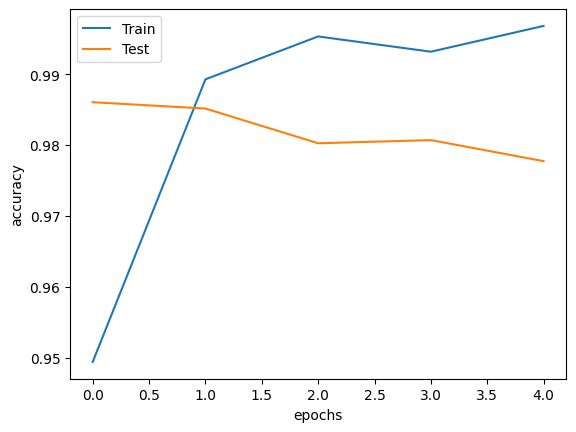

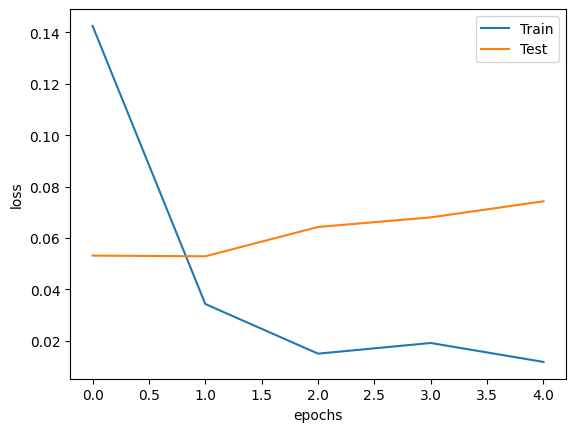

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 5s 13ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9774610244988864

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5879
           1       0.97      0.99      0.98      5346

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



<Axes: >

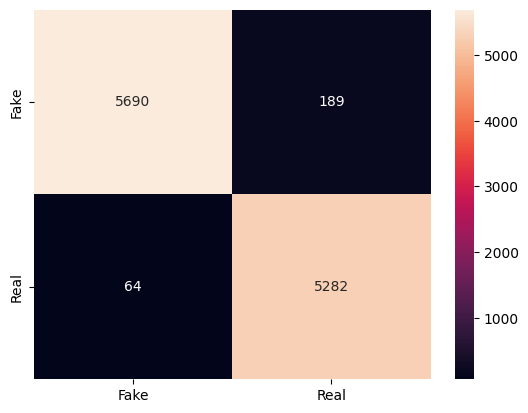

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels = ['Fake','Real'] , yticklabels = ['Fake','Real'])

### **Model using CNN & LSTM**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_features, input_length= 1000, trainable= False))
model.add(Conv1D(32,4,activation='relu'))
model.add(AvgPool1D())
model.add(Conv1D(64,4,activation='relu'))
model.add(AvgPool1D())
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 40)          9222720   
                                                                 
 conv1d_2 (Conv1D)           (None, 997, 32)           5152      
                                                                 
 average_pooling1d_2 (Averag  (None, 498, 32)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_3 (Conv1D)           (None, 495, 64)           8256      
                                                                 
 average_pooling1d_3 (Averag  (None, 247, 64)          0         
 ePooling1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 128)              

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
842/842 [==============================] - 16s 15ms/step - loss: 0.4940 - accuracy: 0.7524 - val_loss: 0.3871 - val_accuracy: 0.8419
Epoch 2/5
842/842 [==============================] - 14s 16ms/step - loss: 0.2856 - accuracy: 0.8865 - val_loss: 0.2288 - val_accuracy: 0.9145
Epoch 3/5
842/842 [==============================] - 13s 15ms/step - loss: 0.2031 - accuracy: 0.9227 - val_loss: 0.2129 - val_accuracy: 0.9213
Epoch 4/5
842/842 [==============================] - 12s 15ms/step - loss: 0.1721 - accuracy: 0.9353 - val_loss: 0.1522 - val_accuracy: 0.9449
Epoch 5/5
842/842 [==============================] - 13s 15ms/step - loss: 0.1440 - accuracy: 0.9466 - val_loss: 0.1590 - val_accuracy: 0.9408


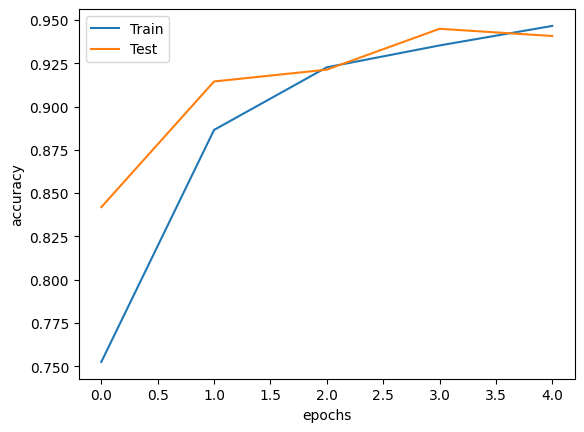

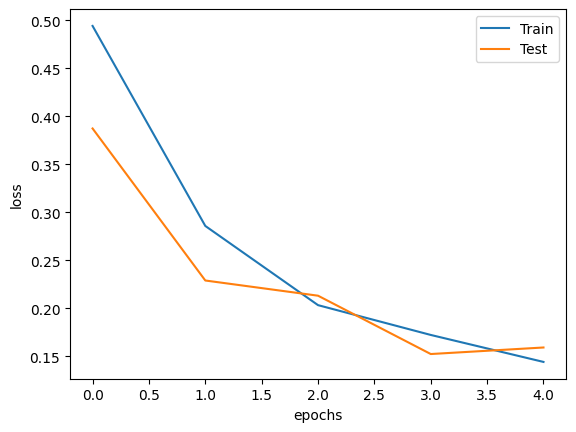

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 2s 5ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5879
           1       0.97      0.89      0.93      5346

    accuracy                           0.94     11225
   macro avg       0.94      0.93      0.93     11225
weighted avg       0.94      0.94      0.94     11225



<Axes: >

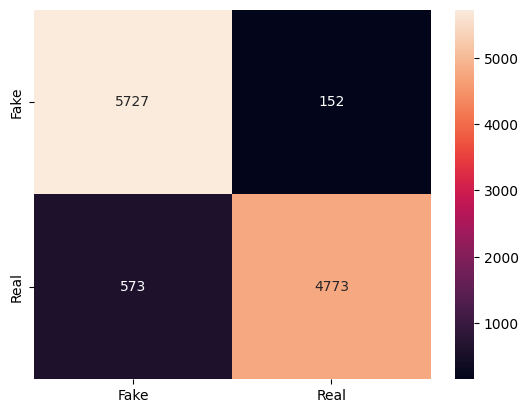

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels = ['Fake','Real'] , yticklabels = ['Fake','Real'])